# Open Source Energy System Modeling: Homework 1

by Theresia Perger

## Scope

The scope of this report is to analyze developements in the transport sector based on SSP scenarios, similar to chaapter 2 of the IPCC Special Report on Global Warming of 1.5°C (see [2]).

## Data and Packages

### Data

IAMC 1.5°C Scenario Explorer and Data hosted by IIASA, release 1.1:
https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/downloads

### Packages 
This notebook uses the following packages:

pyam package: version 0.1.2 (see https://pyam-iamc.readthedocs.io/en/latest/)

pandas: version 0.23.4

matplotlib: version 3.0.3

In [1]:
# import packages
import pyam
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
# import data
df = pyam.IamDataFrame(data='iamc15_scenario_data_all_regions_r1.1.xlsx', encoding='utf-8')

INFO:root:Reading `iamc15_scenario_data_all_regions_r1.1.xlsx`


## Using MESSAGE-GLOBIOM model and SSP scenarios  
### MESSAGE-GLOBIOM 1.0 
The MESSAGE-GLOBIOM model (the energy model MESSAGE together with the land use model GLOBIOM) was developed for the quantification of the shared socio-economic pathways (SSPs), see [3].

### Shared Social-Economic Pathways (SSP)
Data from the following scenarios are provided by the IAMC 1.5°C Scenario Explorer [1]:

In [3]:
scenario_list = df.filter(model='MESSAGE-GLOBIOM 1.0').scenarios()
ssp_scenarios = [word for word in scenario_list if word.startswith('SSP')]
ssp_scenarios

['SSP1-19',
 'SSP1-26',
 'SSP1-34',
 'SSP1-45',
 'SSP1-Baseline',
 'SSP2-19',
 'SSP2-26',
 'SSP2-34',
 'SSP2-45',
 'SSP2-60',
 'SSP2-Baseline',
 'SSP3-34',
 'SSP3-45',
 'SSP3-60',
 'SSP3-Baseline']

The scenarios can be catagorized in:

SSP 1: Sustainability

SSP 2: Middle of the road

SSP 3: Regional rivalry

For detailed documentation of the scenarios and models see [1]. 

## Analysis of the Transport Sector
### 1. Global Developments - All SSP Scenarios

At first we plot a timeseries of the total energy consumption in the global transport sector for all SSP scenarios modeled with MESSAGE-GLOBIOM 1.0.

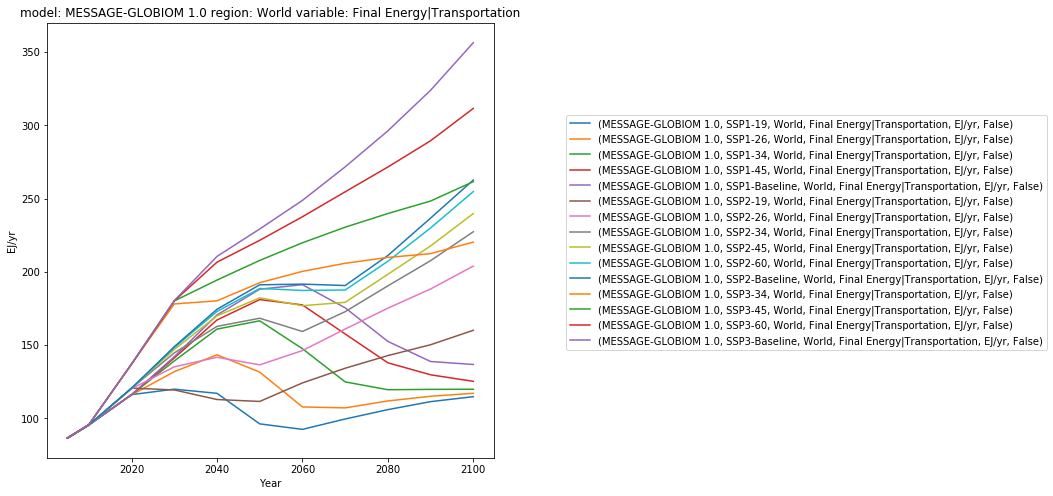

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
df.filter(variable='Final Energy|Transportation', region='World', model='MESSAGE-GLOBIOM 1.0', scenario=ssp_scenarios).line_plot(ax=ax,legend=True)
ax.legend(loc='upper center', bbox_to_anchor=(1.7, 0.8))
plt.show()

The energy consumption varies a lot depending on the scenarios. The global mean temperature in 2100 depending on the scenario is derived next:

In [5]:
(df
 .filter(variable='AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED', region='World',model='MESSAGE-GLOBIOM 1.0',scenario=ssp_scenarios,year=2100)
 .pivot_table(index=['year'], columns=['scenario'], values='value', aggfunc='sum')
)

scenario,SSP1-19,SSP1-26,SSP1-34,SSP1-45,SSP1-Baseline,SSP2-19,SSP2-26,SSP2-34,SSP2-45,SSP2-60,SSP2-Baseline,SSP3-34,SSP3-45,SSP3-60,SSP3-Baseline
year,,,,,,,,,,,,,,,
2100,1.269789,1.688152,2.124354,2.584445,3.263421,1.278103,1.69332,2.170736,2.614057,3.258007,3.799445,2.124596,2.561465,3.26632,4.767625


There are two scenarios, which have a rise in global mean temperature of less than 1.5°C:

SSP1-19 and SSP2-19

### 2. Regional Developments - Specific Scenarios
The two scenarios where global warming stays below 1.5°C are now analyzed on a regional level.

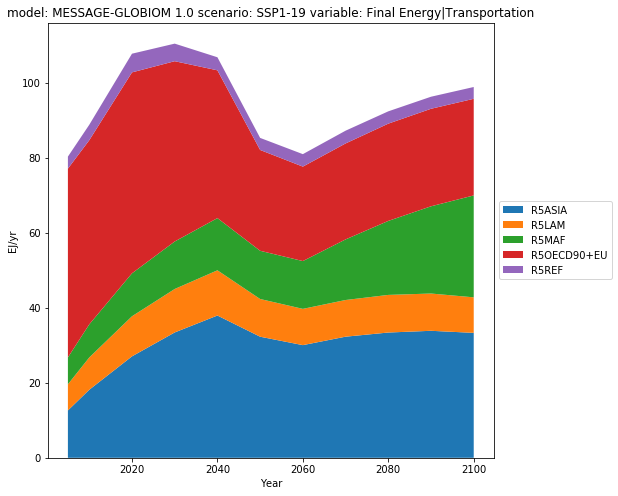

In [6]:
data = (df
        .filter(variable='Final Energy|Transportation')
        .filter(region='World', keep=False)
        .filter(model='MESSAGE-GLOBIOM 1.0')
        .filter(scenario='SSP1-19')
        )
fig, ax = plt.subplots(figsize=(8, 8))
data.stack_plot(ax=ax, stack='region')
plt.show()

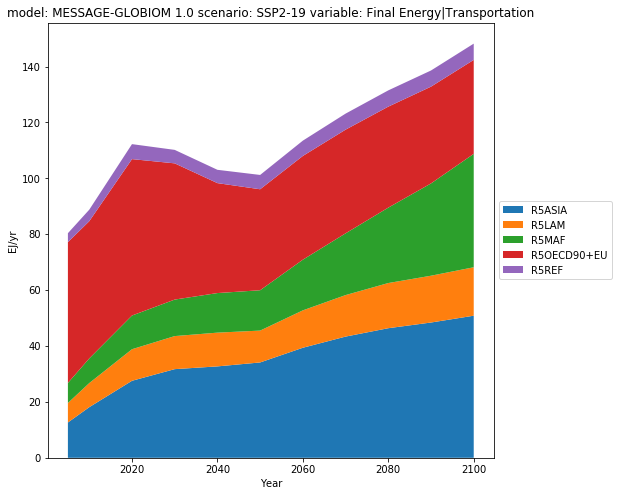

In [7]:
data = (df
        .filter(variable='Final Energy|Transportation')
        .filter(region='World', keep=False)
        .filter(model='MESSAGE-GLOBIOM 1.0')
        .filter(scenario='SSP2-19')
        )
fig, ax = plt.subplots(figsize=(8, 8))
data.stack_plot(ax=ax, stack='region')
plt.show()

### 3. Global Transportation Sector by Energy Source
One sustainable scenario (SSP1-19) and one less sustainable scenario (SSP3-34) are compared. 
#### 3.1 Scenario: SSP1-19

#### Pie Chart of 2050:

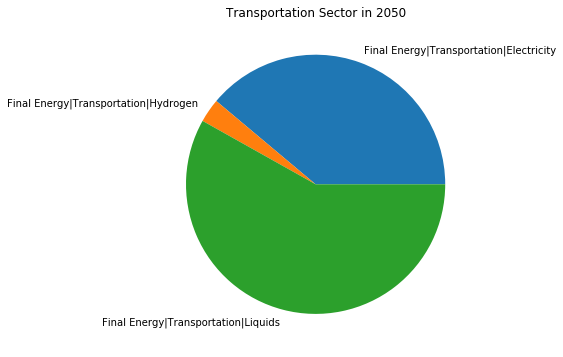

In [8]:
data = df.filter(variable='Final Energy|Transportation|*',
                 level=0,
                 year=2050,
                 region='World',
                model='MESSAGE-GLOBIOM 1.0',
                scenario='SSP1-19'
                )

fig, ax = plt.subplots(figsize=(10, 10))
data.pie_plot(ax=ax)
fig.subplots_adjust(right=0.75, left=0.3)
plt.title('Transportation Sector in 2050')
plt.show()

#### Bar plot with steps of ten-years until 2100:

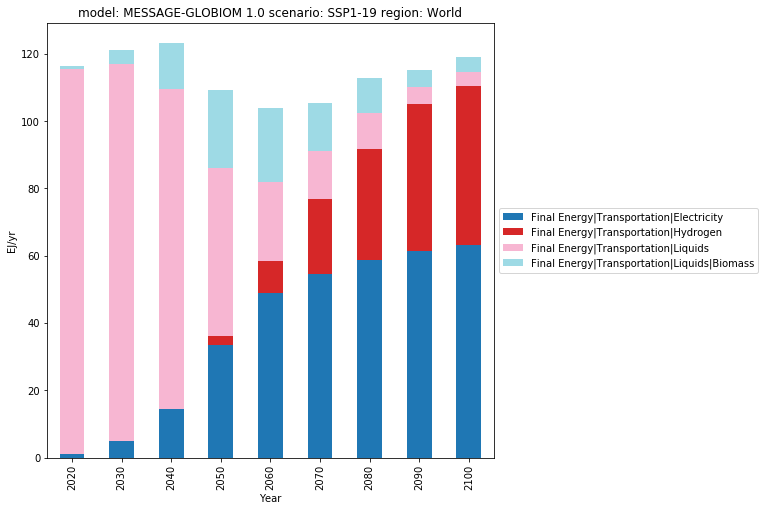

In [9]:
data = df.filter(variable='Final Energy|Transportation|*',
                year=['2020','2030','2040','2050','2060','2070','2080','2090','2100'],
                 model='MESSAGE-GLOBIOM 1.0',
                 region='World',
                scenario='SSP1-19'
                )
fig, ax = plt.subplots(figsize=(8, 8))
data.bar_plot(ax=ax, bars='variable', stacked=True, cmap='tab20')
plt.show()

#### 3.2 SSP3-34
#### Bar plot with steps of ten-years until 2100:

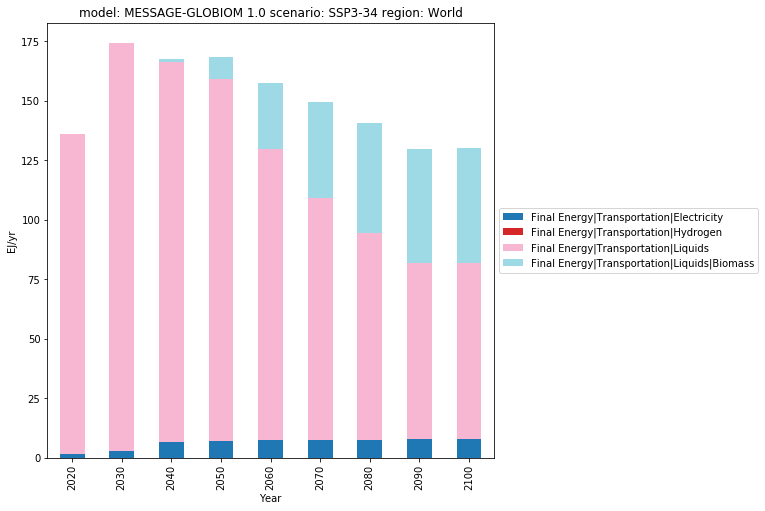

In [10]:
data = df.filter(variable='Final Energy|Transportation|*',
                year=['2020','2030','2040','2050','2060','2070','2080','2090','2100'],
                 model='MESSAGE-GLOBIOM 1.0',
                 region='World',
                scenario='SSP3-34'
                )
fig, ax = plt.subplots(figsize=(8, 8))
data.bar_plot(ax=ax, bars='variable', stacked=True, cmap='tab20')
plt.show()

## Conclusions
The transport sector plays a key role in climate change mitigation. Pathways, which lead to 1.5°C in global warming or less, require a fundamental change in transport sector. Transport systems strongly relying on fossils and even biomass will not lead to a sustainable future of the planet. In sustainable development, electic vehicles (and trucks, airplanes,...) will be necessary as well as switching to hydrogen in some parts of the transport sector. 

## License

   [<img style="float: right;" src="https://img.shields.io/badge/License-Apache%202.0-blue.svg">](https://opensource.org/licenses/Apache-2.0)
   
   Copyright 2019 Theresia Perger

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

     http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.

## References

[1] Daniel Huppmann, Elmar Kriegler, Volker Krey, Keywan Riahi, Joeri Rogelj, Steven K. Rose, John Weyant, et al.,
IAMC 1.5°C Scenario Explorer and Data hosted by IIASA.	
Integrated Assessment Modeling Consortium & International Institute for Applied Systems Analysis, 2018.  	
doi: 	https://doi.org/10.22022/SR15/08-2018.15429

url: 	https://data.ene.iiasa.ac.at/iamc-1.5c-explorer

[2] Joeri Rogelj, Drew Shindell, Kejun Jiang, et al.
Mitigation pathways compatible with 1.5°C in the context of sustainable development,
in "Special Report on Global Warming of 1.5°C (SR15)".
Intergovernmental Panel on Climate Change, Geneva, 2018.

url:    http://www.ipcc.ch/report/sr15/

[3] Krey V, Havlik P, Fricko O, Zilliacus J, Gidden M, Strubegger M, Kartasasmita G, Ermolieva T, Forsell N, Gusti M, Johnson N, Kindermann G, Kolp P, McCollum DL, Pachauri S, Rao S, Rogelj J, Valin H, Obersteiner M, Riahi K (2016) MESSAGE-GLOBIOM 1.0 Documentation. International Institute for Applied Systems Analysis (IIASA), Laxenburg, Austria 

url:    http://data.ene.iiasa.ac.at/message-globiom/.
    